In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the job data CSV
job_file_path = '3jobs_FIFO_UTIL.csv'
job_df = pd.read_csv(job_file_path)

# Filter to get only T4 jobs
t4_jobs = job_df[job_df['gpu_type'] == 'V100']
print(len(t4_jobs))

# Load the resource utilization data CSV
resource_file_path = '3data_FIFO_UTIL.csv'
df = pd.read_csv(resource_file_path)

# Select columns for T4 GPUs
t4_gpu_columns = [col for col in df.columns if 'gpuV100' in col]
t4_gpu_df = df[t4_gpu_columns]

# Loop through each GPU column and create a separate plot
for column in t4_gpu_columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, t4_gpu_df[column], label=f'Utilization ({column})')

    # Overlay T4 job submission times specific to this plot
    for index, j in t4_jobs.iterrows():
        submit_time = j['allocated_at']
        if submit_time in df.index:
            plt.scatter(submit_time, j['num_gpu'], color='red', s=50, zorder=5)

    # Add title, labels, and legend to the plot
    plt.title(f'Resource Utilization of {column} Over Time with T4 Job Submissions')
    plt.xlabel('Time (Entries)')
    plt.ylabel('GPU Utilization (%)')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
import pandas as pd
import pandas as pd

# Path to your CSV file
file_path = '3data_FIFO_UTIL.csv'
# Read the CSV file
df = pd.read_csv(file_path)

t4_gpu_columns = [col for col in df.columns if 'T4' in col and 'gpu' in col]
t4_gpu_df = df[t4_gpu_columns]

import matplotlib.pyplot as plt

# Plotting each T4 GPU utilization over time
plt.figure(figsize=(12, 6))  # Set figure size
for column in t4_gpu_columns:
    plt.plot(t4_gpu_df[column], label=column)

plt.title('Resource Utilization of Each T4 GPU Over Time')
plt.xlabel('Time (Entries)')
plt.ylabel('GPU Utilization (%)')
plt.legend(title='GPU Index', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.grid(True)
plt.show()

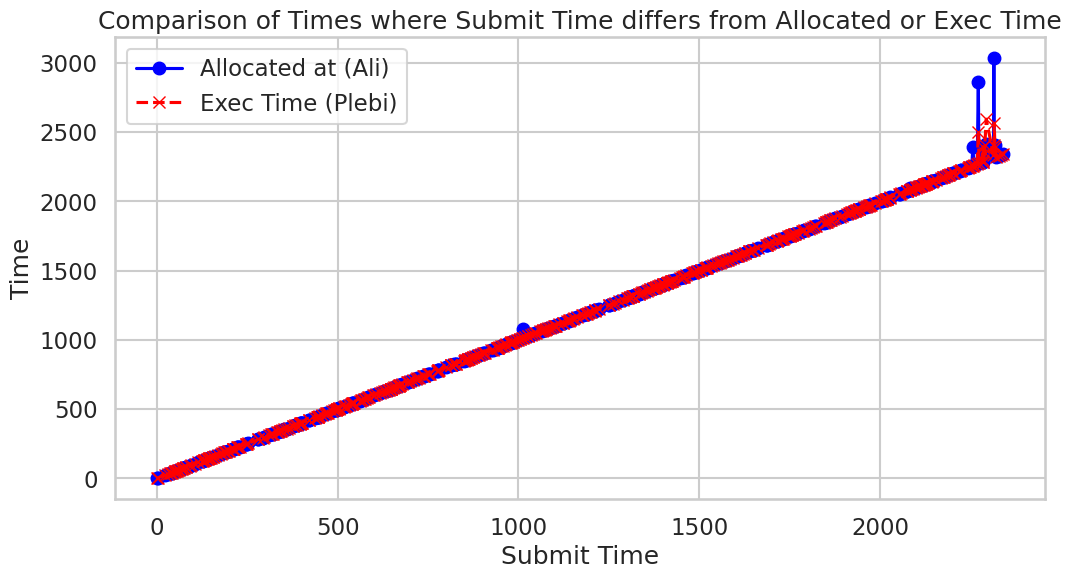

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

scheduling = 'SDF'
allocation = 'UTIL'
number=str(1)
pth = ('/home/andrea/projects/Plebiscitotest/')
csv_plebi = number+'_'+allocation+'_'+scheduling+'_0_nosplit_norebid_allocations.csv'
csv_ali = number+'jobs_'+scheduling+'_'+allocation+'.csv'

df_plebi = pd.read_csv(pth+csv_plebi)
df_ali = pd.read_csv(pth+csv_ali)

# Sort data by 'submit_time'
df_ali_sorted = df_ali.sort_values(by='submit_time')
df_plebi_sorted = df_plebi.sort_values(by='submit_time')

# Filter the DataFrames to include only rows where 'submit_time' is different from 'allocated_at' or 'exec_time'
# df_ali_filtered = df_ali_sorted[df_ali_sorted['submit_time'] != df_ali_sorted['allocated_at']]
# df_plebi_filtered = df_plebi_sorted[df_plebi_sorted['submit_time'] != df_plebi_sorted['exec_time']]

# df_ali_filtered = df_ali_sorted['submit_time']
# df_plebi_filtered = df_plebi_sorted['submit_time']

# Plotting
plt.figure(figsize=(12, 6))  # Set the figure size for better visibility

# Plotting the 'allocated_at' column from both filtered DataFrames
plt.plot(df_ali_sorted['submit_time'], df_ali_sorted['allocated_at'], label='Allocated at (Ali)', marker='o', linestyle='-', color='blue')
plt.plot(df_plebi_sorted['submit_time'], df_plebi_sorted['exec_time'], label='Exec Time (Plebi)', marker='x', linestyle='--', color='red')

# Adding title and labels
plt.title('Comparison of Times where Submit Time differs from Allocated or Exec Time')
plt.xlabel('Submit Time')
plt.ylabel('Time')
plt.legend()  # Add a legend to differentiate the lines

# Show grid for better readability
plt.grid(True)

# Display the plot
plt.show()


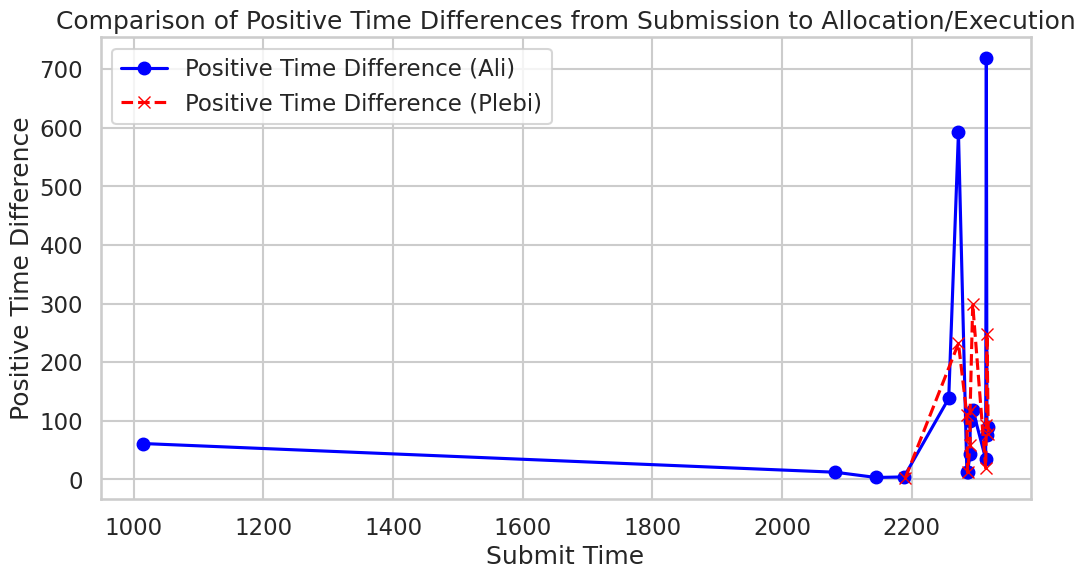

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
# scheduling = 'FIFO'
# allocation = 'SGF'
# number=str(1)
pth = ('/home/andrea/projects/Plebiscitotest/')
csv_plebi = number+'_'+allocation+'_'+scheduling+'_0_nosplit_norebid_allocations.csv'
csv_ali = number+'jobs_'+scheduling+'_'+allocation+'.csv'


df_plebi = pd.read_csv(pth+csv_plebi)
df_ali = pd.read_csv(pth+csv_ali)

# Sort data by 'submit_time'
df_ali_sorted = df_ali.sort_values(by='submit_time')
df_plebi_sorted = df_plebi.sort_values(by='submit_time')

# Calculate the time differences and create new columns
df_ali_sorted['time_diff'] = df_ali_sorted['allocated_at'] - df_ali_sorted['submit_time']
df_plebi_sorted['time_diff'] = df_plebi_sorted['exec_time'] - df_plebi_sorted['submit_time']

# Filter to include only rows where time_diff > 0
df_ali_positive_diff = df_ali_sorted[df_ali_sorted['time_diff'] > 0]
df_plebi_positive_diff = df_plebi_sorted[df_plebi_sorted['time_diff'] > 0]

# Plotting
plt.figure(figsize=(12, 6))

# Plotting the positive time differences for both DataFrames
plt.plot(df_ali_positive_diff['submit_time'], df_ali_positive_diff['time_diff'], label='Positive Time Difference (Ali)', marker='o', linestyle='-', color='blue')
plt.plot(df_plebi_positive_diff['submit_time'], df_plebi_positive_diff['time_diff'], label='Positive Time Difference (Plebi)', marker='x', linestyle='--', color='red')

# Adding title and labels
plt.title('Comparison of Positive Time Differences from Submission to Allocation/Execution')
plt.xlabel('Submit Time')
plt.ylabel('Positive Time Difference')
plt.legend()  # Add a legend to differentiate the lines

# Show grid for better readability
plt.grid(True)

# Display the plot
plt.show()


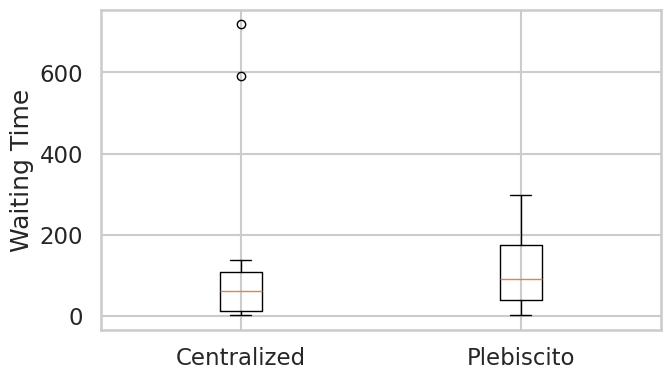

In [41]:
# Combining the data for boxplot

data = [df_ali_positive_diff['time_diff'], df_plebi_positive_diff['time_diff']]
plt.figure(figsize=(7, 4))
plt.boxplot(data, labels=['Centralized', 'Plebiscito'])
plt.ylabel('Waiting Time')

# Adjust the layout to better center the plot
plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.1)

plt.savefig('waiting_fifo_util.pdf')
plt.show()


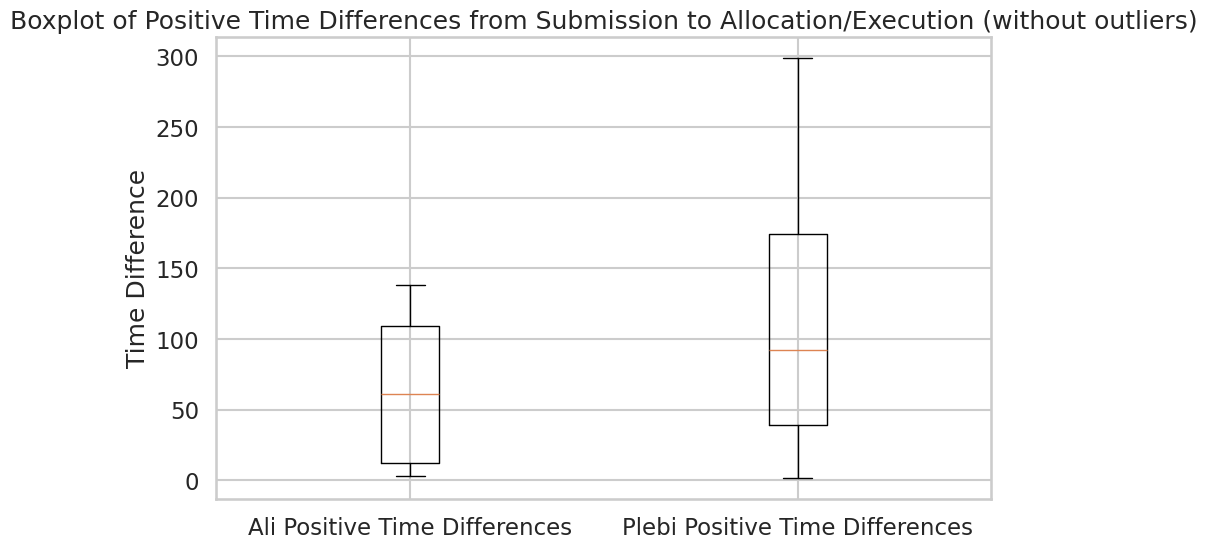

In [42]:
# Sort data by 'submit_time'
df_ali_sorted = df_ali.sort_values(by='submit_time')
df_plebi_sorted = df_plebi.sort_values(by='submit_time')

# Calculate the time differences and create new columns
df_ali_sorted['time_diff'] = df_ali_sorted['allocated_at'] - df_ali_sorted['submit_time']
df_plebi_sorted['time_diff'] = df_plebi_sorted['exec_time'] - df_plebi_sorted['submit_time']

# Filter to include only rows where time_diff > 0
df_ali_positive_diff = df_ali_sorted[df_ali_sorted['time_diff'] > 0]
df_plebi_positive_diff = df_plebi_sorted[df_plebi_sorted['time_diff'] > 0]

# Create a new DataFrame for boxplot data
data_to_plot = [df_ali_positive_diff['time_diff'], df_plebi_positive_diff['time_diff']]

# Creating boxplot without showing outliers
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=['Ali Positive Time Differences', 'Plebi Positive Time Differences'], showfliers=False)

# Adding title and labels
plt.title('Boxplot of Positive Time Differences from Submission to Allocation/Execution (without outliers)')
plt.ylabel('Time Difference')
plt.grid(True)

# Display the plot
plt.show()


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# scheduling = 'FIFO'
# allocation = 'UTIL'
# number=str(1)
pth = ('/home/andrea/projects/Plebiscitotest/')
csv_plebi = number+'_'+allocation+'_'+scheduling+'_0_nosplit_norebid.csv'
csv_ali = number+'data_'+scheduling+'_'+allocation+'.csv'


# for i in range(len(df_gpu)):
#     df_gpu['node_'+str(i)+'_gpu_type'] = df['node_'+str(i)+'_gpu_type'][1]


df_plebi = pd.read_csv(pth+csv_plebi)
df_gpu_plebi = df_plebi.filter(like='used_gpu')
df_ali = pd.read_csv(pth+csv_ali)
df_gpu_ali = df_ali.filter(like='gpu')

# df_ali = pd.read_csv(pth+csv_ali)
# # df_plebi.plot(subplots=True)
# df_gpu.plot(subplots=True, layout=(4,5))
# # df_plebi.hist(layout=(5,4), figsize=(15,10))
# plt.tight_layout()
# plt.show()

In [44]:
for i, col in enumerate(df_gpu_plebi.columns):
   name = col +'_'+ df_plebi['node_'+str(i)+'_gpu_type'][1]
   df_gpu_plebi.rename(columns={col: name}, inplace=True)


/tmp/ipykernel_15103/161360093.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gpu_plebi.rename(columns={col: name}, inplace=True)


array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

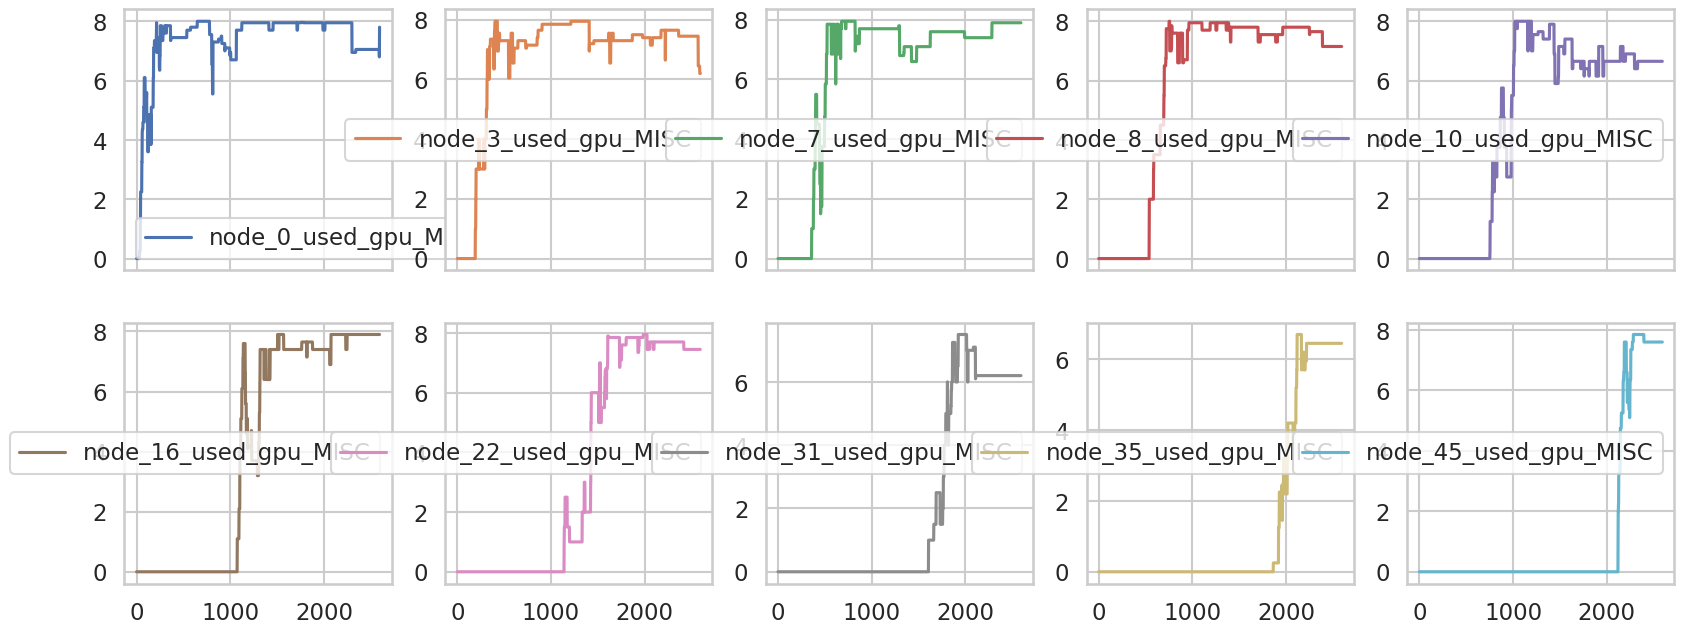

In [45]:
gpu_type = 'MISC'
df_gpu_tmp_plebi = df_gpu_plebi.filter(like=gpu_type)

df_gpu_tmp_plebi.plot(subplots=True, layout=(10, 5), legend=True, figsize=(20, 40))  # Width, Height in inches

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

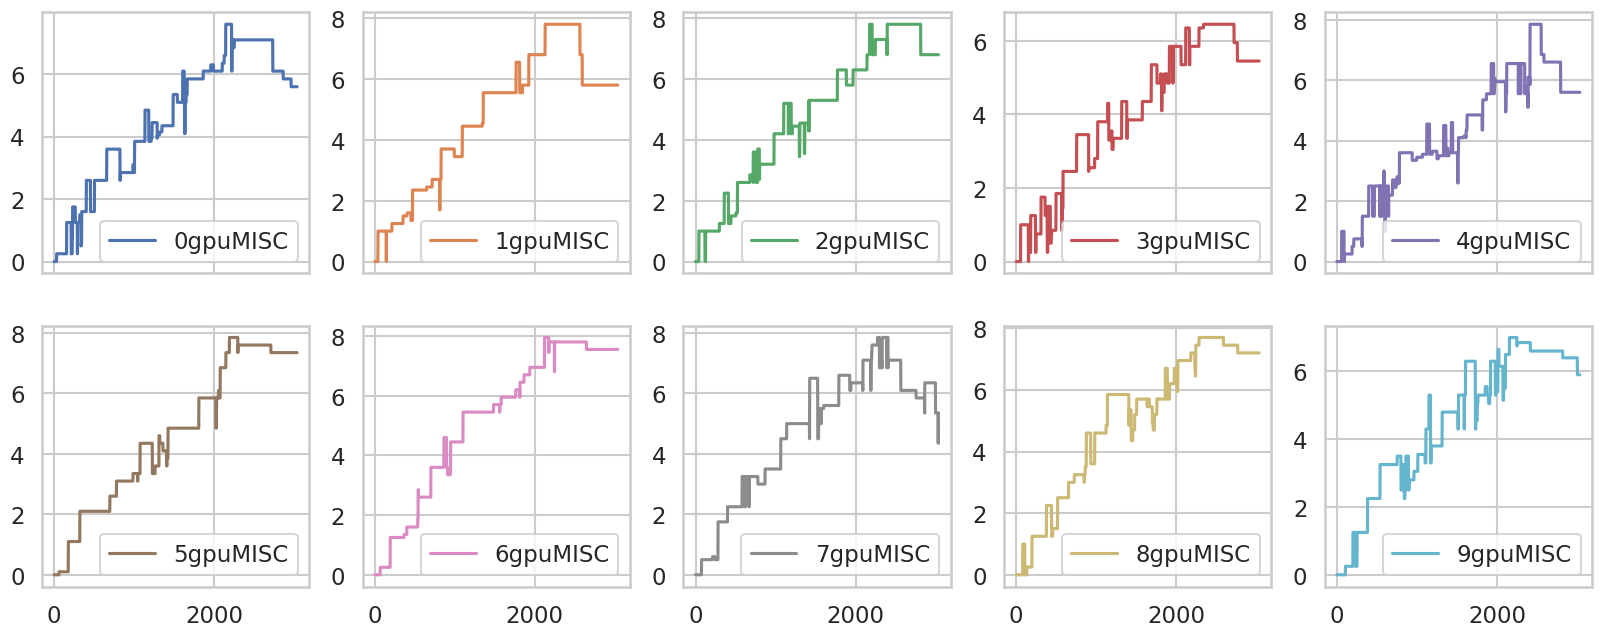

In [46]:
df_gpu_tmp_ali = df_gpu_ali.filter(like=gpu_type)

df_gpu_tmp_ali.plot(subplots=True, layout=(10, 5), legend=True, figsize=(20, 40))  # Width, Height in inches

node_0_used_gpu_MISC        Axes(0.125,0.814746;0.133621x0.0652542)
node_3_used_gpu_MISC     Axes(0.285345,0.814746;0.133621x0.0652542)
node_7_used_gpu_MISC      Axes(0.44569,0.814746;0.133621x0.0652542)
node_8_used_gpu_MISC     Axes(0.606034,0.814746;0.133621x0.0652542)
node_10_used_gpu_MISC    Axes(0.766379,0.814746;0.133621x0.0652542)
node_16_used_gpu_MISC       Axes(0.125,0.736441;0.133621x0.0652542)
node_22_used_gpu_MISC    Axes(0.285345,0.736441;0.133621x0.0652542)
node_31_used_gpu_MISC     Axes(0.44569,0.736441;0.133621x0.0652542)
node_35_used_gpu_MISC    Axes(0.606034,0.736441;0.133621x0.0652542)
node_45_used_gpu_MISC    Axes(0.766379,0.736441;0.133621x0.0652542)
dtype: object

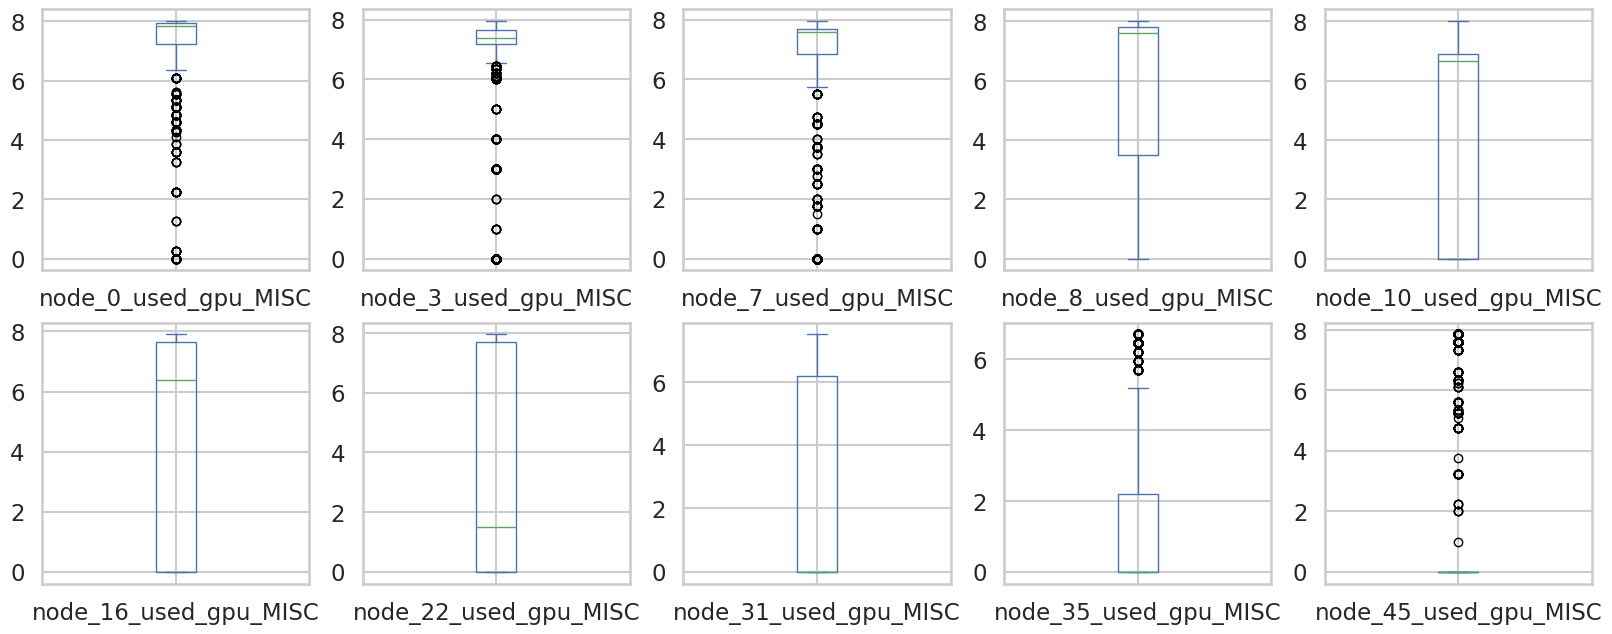

In [47]:
df_gpu_tmp_plebi.plot(kind='box', subplots=True, layout=(10, 5), sharex=False, sharey=False, figsize=(20, 40))

0gpuMISC       Axes(0.125,0.814746;0.133621x0.0652542)
1gpuMISC    Axes(0.285345,0.814746;0.133621x0.0652542)
2gpuMISC     Axes(0.44569,0.814746;0.133621x0.0652542)
3gpuMISC    Axes(0.606034,0.814746;0.133621x0.0652542)
4gpuMISC    Axes(0.766379,0.814746;0.133621x0.0652542)
5gpuMISC       Axes(0.125,0.736441;0.133621x0.0652542)
6gpuMISC    Axes(0.285345,0.736441;0.133621x0.0652542)
7gpuMISC     Axes(0.44569,0.736441;0.133621x0.0652542)
8gpuMISC    Axes(0.606034,0.736441;0.133621x0.0652542)
9gpuMISC    Axes(0.766379,0.736441;0.133621x0.0652542)
dtype: object

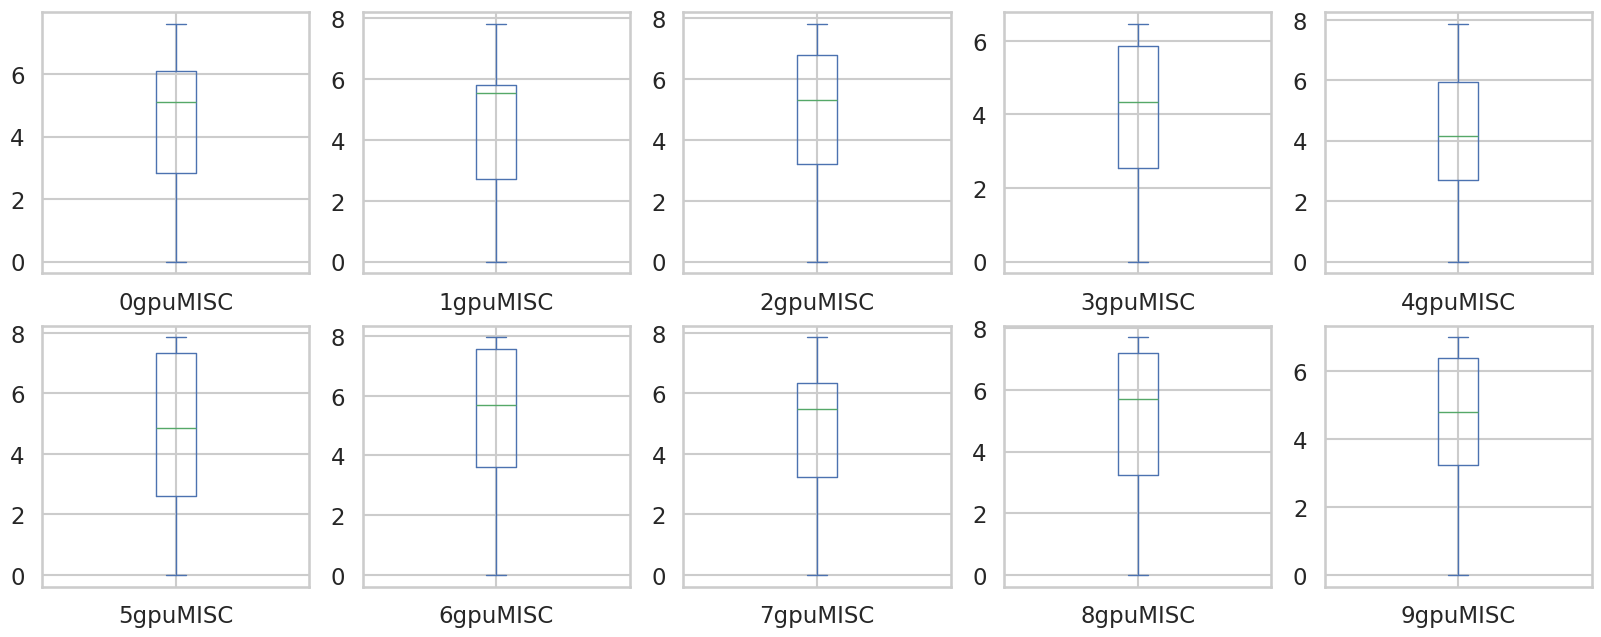

In [48]:

df_gpu_tmp_ali.plot(kind='box', subplots=True, layout=(10, 5), sharex=False, sharey=False, figsize=(20, 40))

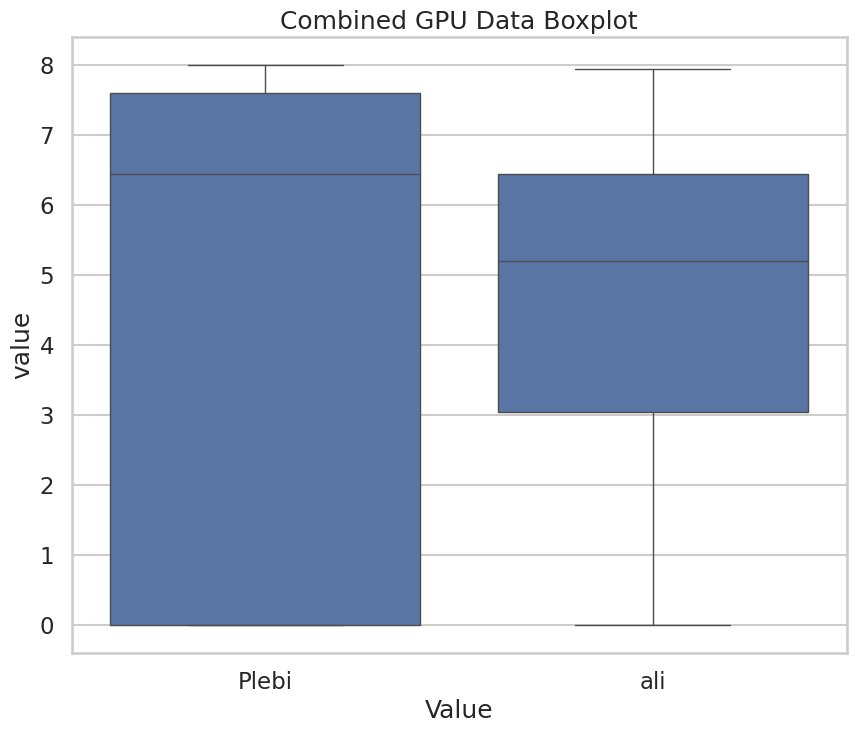

In [49]:
import seaborn as sns
df_gpu_melted_plebi = df_gpu_tmp_plebi.melt()

# Duplicate and assign categories
df_gpu_melted_plebi['category'] = 'Plebi'
df_gpu_melted_ali = df_gpu_tmp_ali.melt()
df_gpu_melted_ali['category'] = 'ali'


# Combine the two DataFrames
combined_df = pd.concat([df_gpu_melted_plebi, df_gpu_melted_ali])
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.boxplot(x='category', y='value', data=combined_df)
plt.title('Combined GPU Data Boxplot')
plt.xlabel('Value')  # You can change this label to something more meaningful
plt.show()